<img src="https://www.dal.ca/content/dam/www/cmc-content-admin/brand/dal-logo-horizontal-colour.png.lt_858a77bd5c6784989b19b6cf05366bf8.res/dal-logo-horizontal-colour.png" alt="Dalogo" width="200"/>

# CSCI 4144 -  Data Mining and Data Warehousing
# Assignment 4 - Visualization and decision making

**Due:** 3 April 2024, anywhere on Earth

**Your name:** Ana Hernandez

**Your Banner ID:** B00858520

**Your NetID:** an504036

### Assessment

***!This cell is completed only by your marker!***


| #  | Section       |Mark | Out of  |  Comments |
|----|---------------|-----|---------|-----------|
| 1  | Section 1     |     | / 7    |           |
| 2  | Section 2     |     | / 7    |           |
| 3  | Section 3     |     | / 7    |           |
| 4  | Bonus         |     | / 5    |           |
| -  | TOTAL         |     | / 21    |           |

In [212]:
# import any libraries here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# TODO: add any additional libraries here

# your code should run in Python3

## Section 0 - A fish, a fish, a fishy oh

There are many ways we can use data mining for knowledge and positive societal benefit. So far, we have used healthcare datasets and a political dataset, and now we will wrap up with datasets related to health and the environment, specifically around seafood (we're in Halifax after all).

For this assignment, you have more freedom regarding which data you use and how you will approach their use. There are three datasets from which to choose.

### Datasets

- **per-capita-sources-of-protein.csv** describes the relationship between countries (columns A and B), years (column C), and the amount of grams of protein consumed per day per capita according to different types of food, i.e., plants (column D), meat (E), eggs (F), dairy (G), and seafood (H). This dataset would be appropriate to ask certain questions about health in terms of nutrition. Source: Food and Agriculture Organization of the United Nations
- **fish-stocks-within-sustainable-levels.csv** describes the relationship between countries or regions (columns A and B), years (column C), and the proportion of fish stocks within biologically sustainable levels (not overexploited) (column D) or overexploited (column E). This dataset would be appropriate to ask questions about sustainability. You may wish to extrapolate from the data into the future.  Source: Food and Agriculture Organization of the United Nations. Note: Fish stock are subpopulations of a particular species of fish which have common parameters such as location, growth and mortality which define their population dynamics.
- **environmental-factors.csv** describes the environmental factors for different species of seafood (plus dumb, noisy, stinky chickens as a baseline; column A) across Freshwater use (m3 / kg edible weight; column C),Nitrogen (kgN / t edible weight; column D),Land use (m2 / kg edible weight; column E),and Greenhouse gas emissions (kg / kg edible weight; column F). Note 1: All years are 2021. Note 2: Some species have both wild and farmed subtypes (column A) that you may wish to consider. Data published by Gephart, J. A., Henriksson, P. J., Parker, R. W., Shepon, A., Gorospe, K. D., Bergman, K., ... & Tyedmers, P. (2021). [Environmental performance of blue foods](https://www.nature.com/articles/s41586-021-03889-2). Nature.

Each of the three datasets above were obtained from [Our World In Data](https://ourworldindata.org/fish-and-overfishing), where you can find additional information. You can use `df.head()` to see a sample of the data (including column names), and you can use `df.describe()` to obtain some simple statistics, for Pandas dataframe `df`.

### Tools

You can use any Python library to help you produce visualizations. However, we strongly suggest either:

1. [Seaborn](https://seaborn.pydata.org/),
2. [Matplotlib](https://matplotlib.org/), or
3. [Plotly](https://plotly.com/python/).

It is likely that most CSCI 4144 students would prefer Seaborn. Details of these libraries, including their APIs, examples, and other documentation, are provided in the links above.

### Tasks

You will perform three analyses of your choice (one per Section), using any combination of the datasets above. E.g.,:

- You can use one dataset of your choice for *all* of the following three Sections,
- You can use a unique dataset of your choice for *each* of the following three Sections,
- You can use multiple datasets in any combination of the three following Sections. That is, you can even combine datasets for any Section (if you wish).

Each task/section consists of the following parts:

1. Apply a visualization to your chosen data, 
2. Explain why you chose that visualization and how you considered Bertin's visual variables (e.g., colour, size, shape, or position; see Lec 09),
3. Provide a conclusion from your visualization
4. Provide an explanation as to why your visualization supports that conclusion and any limitations of the data or visualization.

For example, if your data consisted of countries and their geographic areas, your response could be:

1. To sort the data by descending square miles and to draw a bar chart: 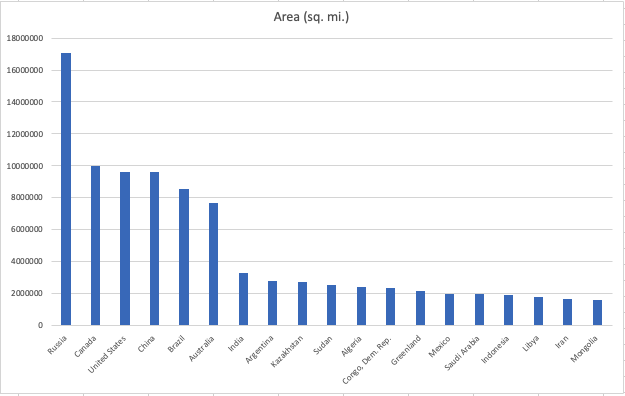
2. Explain that you chose a bar chart because one dimension (country) is nominal and the other (sq. miles) is continuous, and that you sorted them so that you could quickly compare the trend among the largest countries. Explain that you did not change the colour of the bars because there is no variable that would modulate colour that is not already being used.
3. Conclude that, in order for Canada to become the largest country by area, Russia would have to be divided (or to divide itself) into smaller countries no larger than 9,984,670 sq. miles each.
4. Say that this conclusion is supported by the fact that Canada, the 2nd largest country by area, is 9,984,670 sq. miles.

You ***must*** use three distinct *types* of visualization (e.g., bar, line, scatter) across the three Sections. If you repeat a type of visualization in a Section, you risk all marks for that Section.

The meaning of marks are provided in the section descriptions below.

**Hint**: You may want to clean and preprocess your dataset using Python libraries such as Pandas or NumPy and to handle missing values, outliers, or any other issues that might affect the accuracy of your visualization. This is not a _requirement_ but it is recommended _if_ it helps produce more meaningful visualizations.

**Hint**: Consider when it is appropriate to use _relative scales (e.g., percentages) vs absolute scales_. E.g., consider when it might  matter exactly how much seafood someone eats per day in a particular country, versus what proportion of their protein intake comes from seafood.

**Hint**: In your visualizations, be sure to include *all* relevant details, including axis labels, axis titles, visualization title, and any relevant legends for colours or symbols.

**Hint**: Be sure to properly cite your sources, like the scientist that you are.

# Section 1 

In [213]:
# 1. load the dataset and plot a visualization 
#    0 marks: not done
#    1 mark: done, but important information (e.g., legend or labels) is missing
#    2 marks: otherwise

# TODO: your code goes here, below. Be sure to handle potential errors. 
dfFish = pd.read_csv("fish-stocks-within-sustainable-levels.csv", na_values=0)
dfFish.fillna(0,inplace=True)
   

[]

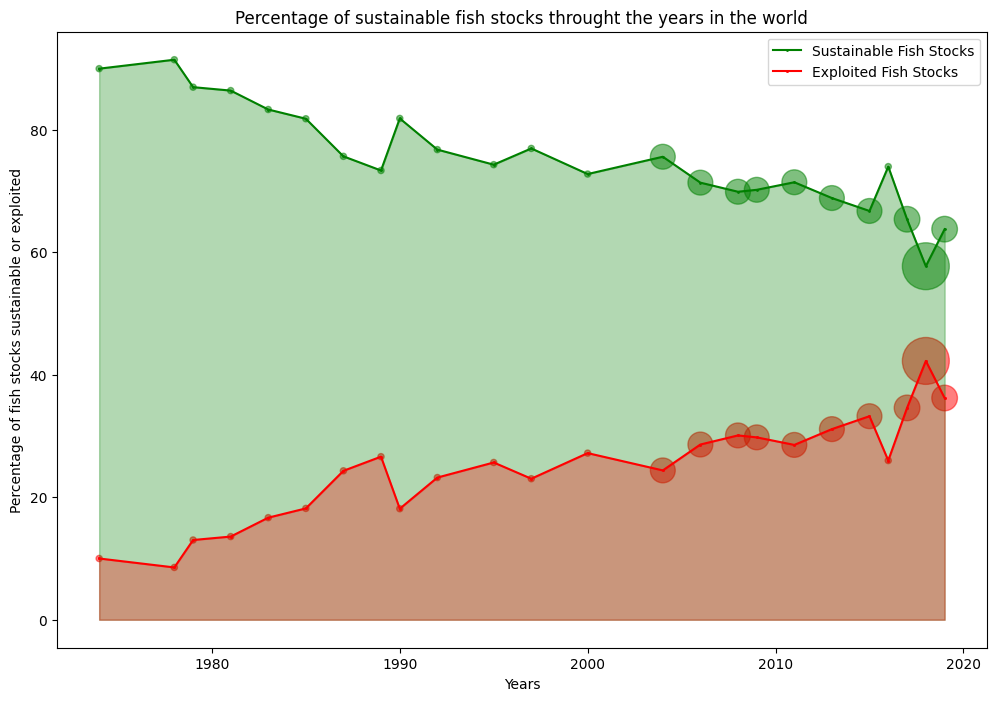

In [214]:
# The data provided has different entries for the years, I'll add these and work on these

sustainable = 'Percentage of fish stocks within biologically sustainable levels'
exploited = 'Percentage of overexploited fish stocks'

fishEntriesPerYear = dfFish.groupby('Year').agg({
    sustainable:'sum',
    exploited: 'sum'
}).reset_index()
fishEntriesPerYear.columns = ['Year', sustainable, exploited]
fishEntriesPerYear['Entries'] = dfFish.groupby('Year').size().values
fishEntriesPerYear[sustainable] = fishEntriesPerYear[sustainable]/fishEntriesPerYear['Entries']
fishEntriesPerYear[exploited] = fishEntriesPerYear[exploited]/fishEntriesPerYear['Entries']

# So far I have added up the percentages of each entry per country and 

plt.figure(figsize=(12, 8))
plt.plot(fishEntriesPerYear['Year'], fishEntriesPerYear[sustainable], marker='o', markersize=1, label='Sustainable Fish Stocks', color='green')
plt.plot(fishEntriesPerYear['Year'], fishEntriesPerYear[exploited], marker='s', markersize=1, label='Exploited Fish Stocks', color='red')
plt.scatter(fishEntriesPerYear['Year'], fishEntriesPerYear[sustainable], s=fishEntriesPerYear['Entries'] * 20, color='green', alpha=0.5)
plt.scatter(fishEntriesPerYear['Year'], fishEntriesPerYear[exploited], s=fishEntriesPerYear['Entries'] * 20, color='red', alpha=0.5)

plt.fill_between(fishEntriesPerYear['Year'], fishEntriesPerYear[sustainable], color='green', alpha=0.3)
plt.fill_between(fishEntriesPerYear['Year'], fishEntriesPerYear[exploited], color='red', alpha=0.3)
plt.legend()
plt.xlabel("Years")
plt.ylabel("Percentage of fish stocks sustainable or exploited")
plt.title("Percentage of sustainable fish stocks throught the years in the world")
plt.plot()


2. In this cell, explain why you chose that visualization and how you considered Bertin's visual variables (see Lec 09). 

- 0 marks: not done
- 1 mark: done, but important information (e.g., aspect of the graph exists without explanation) is missing
- 2 marks: otherwise

**TODO**: your response goes here



The data presented in the graph are percentages throught the years, a linear representation suits these data points. The percentages are added up and then divided by the number of entries to keep the data normalized (from 0 to 100). If one pays attention to the graph, there is a weight to the points (the circle behind the actual data point). These points represent how many data entries are in the dataset. 
The decision for as why present them per year and not per country is due to the entries that represent oceans or "WORLD". 

3. Provide a conclusion from your visualization

- 0 marks: not done, or conclusion too obvious (e.g., "countries have areas")
- 1 mark: reasonable conclusion

**TODO**: your response goes here


It seems the percentage of exploited fish has been growing as the years pass by. It seems that, before 2005, although the numbers were getting higher, it could be that the lack of entries made the numbers high. We have a spike on 2018 with more entries than the rest of the years, and before 2018 we see a data point that is lower than the others surrounding it. This may be an indication that the percentage of exploited fish is growing more than the graph says.

4. Provide an explanation as to why your visualization supports that conclusion  and any limitations of the data or visualization.

- 0 marks: not done
- 1 mark: done, but conclusion is not completely derived from visualization
- 2 marks: otherwise

**TODO**: your response goes here


The point where exploited fish are growing faster than what the graph says comes from the weight of the data points. I will call them weights but it is only the number of entries per year. From 2005, the weights are bigger than before, and 2005 is lower than the previous datapoint, this observation comes with the comment that the single entries were making the numbers bigger than they actually where. After 2005, the exploited fish grow at a rate that does not seem alarming, but before 2018 we get a single entry, which is as low as the data points where before in 2005. But 2018 comes next and it displays a high maximum of exploited fish, which brings the question that perhaps the exploited fish began to grow exponentially, since the next weight is lower than 18 and is high.

So, in conclusion
- Before 2005 there were single entries. In 2005 we get more than one and it is lower, therefore, before 2005 the percentages of exploited fish were lower than they seemed and the single percentages made the numbers high.
- After 2005 we get more points. Before 2018 we get a single point, but unlike before 2005, it is lower than expected. After this low, we get a very high percentage of exploited fish and a high weight. After this high, we get a low with low weights. This observation concludes that there may be exponential growth that cannot be observed because of the lack of datapoints.

### Assessment for section 1

***!This cell is completed only by your marker!***


| #  | Task          |Mark | Out of  |  Comments |
|----|---------------|-----|---------|-----------|
| 1  | Load & show   |     | / 2     |           |
| 2  | explain graph |     | / 2     |           |
| 3  | conclusion  |     | / 1     |           |
| 4  | relate conclusion to visualization          |     | / 2     |           |
| -  | TOTAL         |     | / 7      |           |


# Section 2 

In [215]:
# 1. load the dataset and plot a visualization 
#    0 marks: not done
#    1 mark: done, but important information (e.g., legend or labels) is missing
#    2 marks: otherwise

# TODO: your code goes here, below. Be sure to handle potential errors. 
#   
dfProtein = pd.read_csv('per-capita-sources-of-protein.csv')
   

In [216]:
# Well normalize the data because it seems it is all over the place
veggies = 'Vegetal Products | 00002903 || Food available for consumption | 0674pc || grams of protein per day per capita'
fish = 'Fish and seafood | 00002960 || Food available for consumption | 0674pc || grams of protein per day per capita'
meat = 'Meat, total | 00002943 || Food available for consumption | 0674pc || grams of protein per day per capita'
eggs = 'All egg products | 00002744 || Food available for consumption | 0674pc || grams of protein per day per capita'
milk = 'Milk | 00002948 || Food available for consumption | 0674pc || grams of protein per day per capita'

def normalize(df, column):
    minValue = df[column].min()
    maxValue = df[column].max()
    df[column] = (df[column]-minValue)/(maxValue-minValue)

normalize(dfProtein, veggies)
normalize(dfProtein, fish)
normalize(dfProtein, meat)
normalize(dfProtein, eggs)
normalize(dfProtein, milk)

proteinPerYears = dfProtein.groupby('Year').agg({
    veggies:'sum',
    fish: 'sum',
    meat: 'sum',
    eggs: 'sum',
    milk: 'sum'
}).reset_index()
proteinPerYears.columns = ['Year', veggies, fish, meat, eggs, milk]
proteinPerYears['Entries'] = dfProtein.groupby('Year').size().values
proteinPerYears[veggies] = proteinPerYears[veggies]/proteinPerYears['Entries']
proteinPerYears[fish] = proteinPerYears[fish]/proteinPerYears['Entries']
proteinPerYears[meat] = proteinPerYears[meat]/proteinPerYears['Entries']
proteinPerYears[eggs] = proteinPerYears[eggs]/proteinPerYears['Entries']
proteinPerYears[milk] = proteinPerYears[milk]/proteinPerYears['Entries']

# We'll use a similar approach

y_labels = ["Veggies", 'Fish', 'Meat', 'Egg','Milk']

proteinPerYears = proteinPerYears.rename(columns={veggies:"Veggies", fish:"Fish", meat: "Meat", eggs:"Egg", milk: "Milk"})
proteinPerYears = proteinPerYears.set_index("Year")


Text(0.5, 1.0, 'Sources of protein through the years around the world')

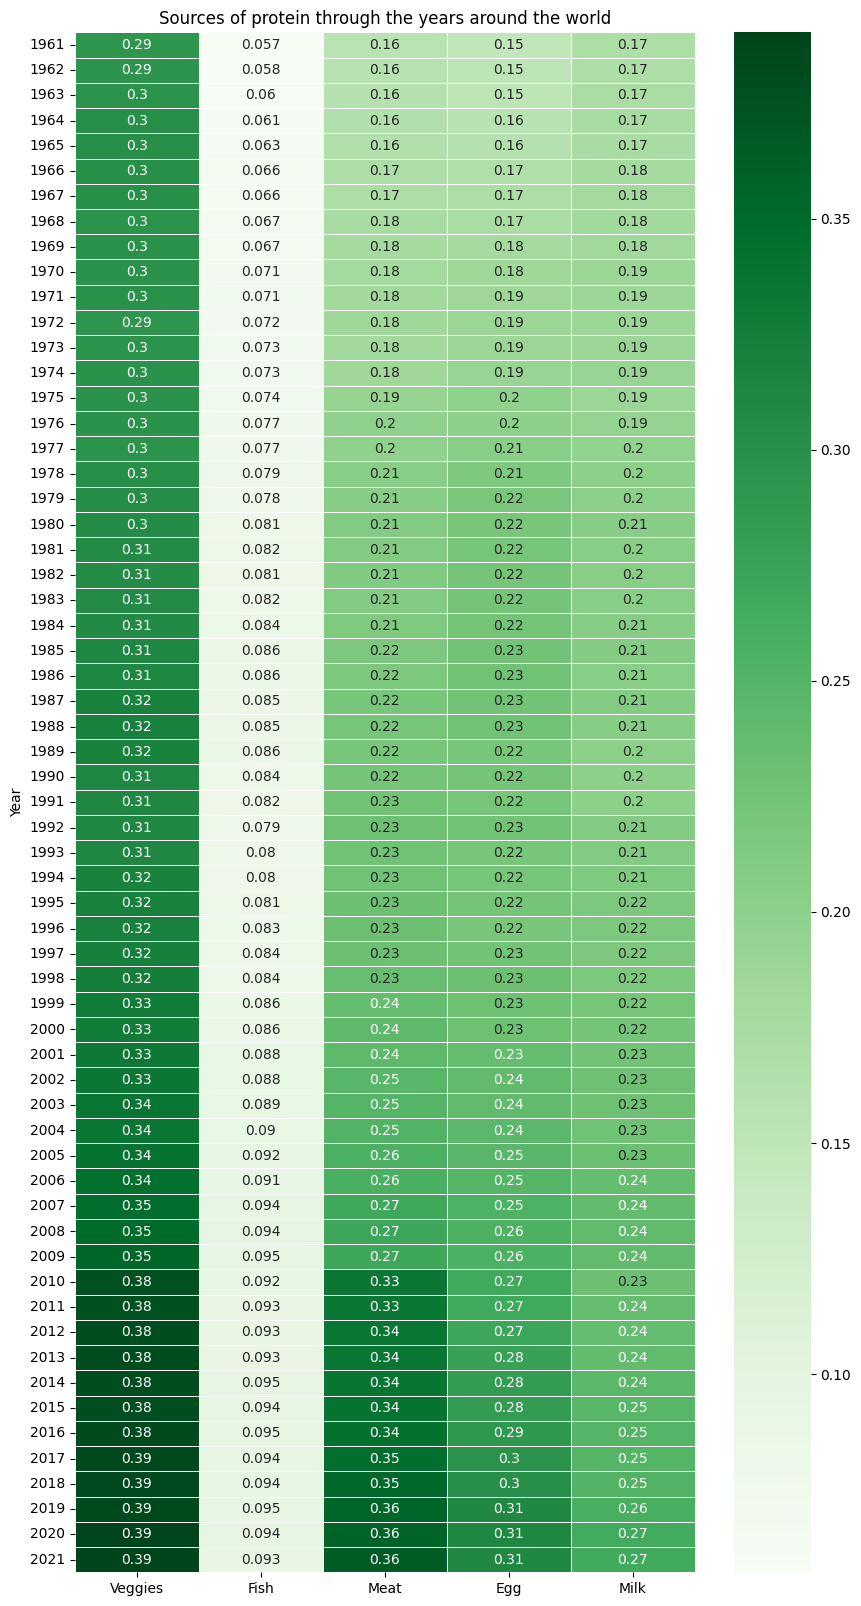

In [217]:
fig, ax = plt.subplots(figsize=(10,20)) 
sns.color_palette("coolwarm", as_cmap=True)
sns.heatmap(proteinPerYears.drop(columns=["Entries"]), annot=True, linewidths=.5, cmap="Greens")
plt.title("Sources of protein through the years around the world")

2. In this cell, explain why you chose that visualization and how you considered Bertin's visual variables (see Lec 09). 

- 0 marks: not done
- 1 mark: done, but important information (e.g., aspect of the graph exists without explanation) is missing
- 2 marks: otherwise

**TODO**: your response goes here



I chose this visualization to see side by side how the consumption of protein has changed through the years in a global scale. The color is meant to help determine what is higher, the darker the color, the higher the consumption of that product. Bertin's visual variables include Hue, the change of color depics information, the darker the higher the value it is, the lower, the less value it has.

3. Provide a conclusion from your visualization

- 0 marks: not done, or conclusion too obvious (e.g., "countries have areas")
- 1 mark: reasonable conclusion

**TODO**: your response goes here


It seems for vegetables, fish, and milk the consumption hasn't changed much through the years, in a global scale, they have been consumed in a constant pace. As for meat, we see a change towards more consumption as te years go by. The eggs seem to follow the meat but not in the same degree.

4. Provide an explanation as to why your visualization supports that conclusion  and any limitations of the data or visualization.

- 0 marks: not done
- 1 mark: done, but conclusion is not completely derived from visualization
- 2 marks: otherwise

**TODO**: your response goes here


If the data is not observed detailed wise (as in, not reading the numbers and just folowing the color), one could point out that veggies doesn't change much although it does turn darker over time, meat changes more than eggs, but both change more than veggies. The color allows us to come with conclusions that may be correct. But it fails to show much difference for milk, who changes as much as veggies. Both Veggies and Milk get +.10 from the first data point to the last, Meat gets +.20, Eggs get +.16 and fish gets the least gain throught the years, which is less than .1. The limitation of this is not knowing what countries this includes, which may or may not affect the graph, perhaps there are more countries in the dataset that produce veggetables and animal products compared to countries that catch fish and that may be affecting the graph.

### Assessment for section 2

***!This cell is completed only by your marker!***


| #  | Task          |Mark | Out of  |  Comments |
|----|---------------|-----|---------|-----------|
| 1  | Load & show   |     | / 2     |           |
| 2  | explain graph |     | / 2     |           |
| 3  | conclusion  |     | / 1     |           |
| 4  | relate conclusion to visualization          |     | / 2     |           |
| -  | TOTAL         |     | / 7      |           |


# Section 3 

In [221]:
# 1. load the dataset and plot a visualization 
#    0 marks: not done
#    1 mark: done, but important information (e.g., legend or labels) is missing
#    2 marks: otherwise

# TODO: your code goes here, below. Be sure to handle potential errors. 

"""
I found the data after spending hours looking for this one. 
The previous data I also spent hours looking for until I saw that download button on the graphs in the 
webpage of Our World in Data.
"""
dfEnvironment = pd.read_csv('https://web.cs.dal.ca/~zhengping/environmental-factors.csv', na_values=0)
dfEnvironment.fillna(0,inplace=True)
dfEnvironment.columns
# we drop chickens 'cause we're dealing with fish
dfEnvironment = dfEnvironment.drop([3])
   

Text(0.5, 1.0, 'Environmental Factors on fish population 2021')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


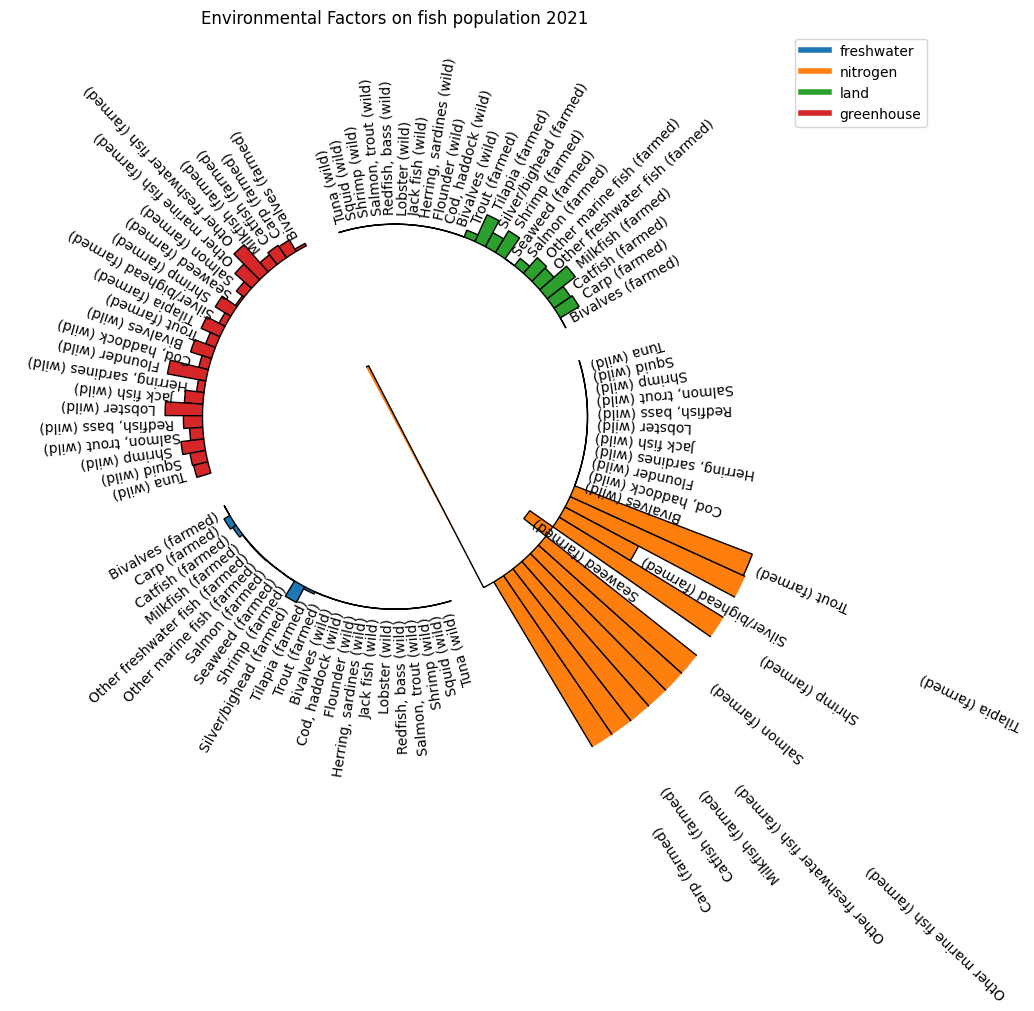

In [222]:
labels = dfEnvironment['Entity']
freshwater = dfEnvironment['Freshwater use (m3 / kg edible weight)'].values
nitrogen = dfEnvironment['Nitrogen (kgN / t edible weight)'] .values
land = dfEnvironment['Land use (m2 / kg edible weight)'].values
greenhouse = dfEnvironment['Greenhouse gas emissions (kg / kg edible weight)'].values

details = {
    "freshwater":freshwater,
    "nitrogen":nitrogen,
    "land": land,
    "greenhouse": greenhouse,
}

""" 
The following code was done with the help of the following webpage:
    https://python-graph-gallery.com/circular-barplot-with-groups/
The code helped to generate the graph, I altered the way data was read in order to fit the dataset
"""
def get_label_rotation(angle, offset):
    rotation = np.rad2deg(angle + offset)
    if angle <= np.pi:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"
    return rotation, alignment
def add_labels(angles, values, labels, offset, ax, padding=7):
    # Iterate over angles, values, and labels, to add all of them.
    for angle, value, label, in zip(angles, values, labels):
        rotation, alignment = get_label_rotation(angle, offset)
        ax.text(
            x=angle, 
            y=value + padding, 
            s=label, 
            ha=alignment, 
            va="center", 
            rotation=rotation, 
            rotation_mode="anchor"
        ) 

groups = ["freshwater", "nitrogen", "land", "greenhouse"]
groups_sizes = [len(freshwater), len(nitrogen), len(land), len(greenhouse)]
padding = 3
angles = np.linspace(0, 2 * np.pi, (len(freshwater)+len(nitrogen)+len(land)+len(greenhouse))+padding*len(groups), endpoint=False).tolist()
circle_width = 2 * np.pi / (len(angles))

circle_offset = 0
index = []
for i in groups_sizes:
    index += list(range(circle_offset + padding, circle_offset + i + padding))
    circle_offset += i + padding

fig, ax = plt.subplots(figsize=(30, 10), subplot_kw={"projection": "polar"})

ax.set_theta_offset(circle_offset)
ax.set_ylim(-100, 100)
ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

colors = [f"C{i}" for i, size in enumerate(groups_sizes) for _ in range(size)]
group_labels = [i for i in groups for _ in range(0, groups_sizes[0])]
angles = np.array(angles)

dataset = np.append(np.append(freshwater, nitrogen), np.append(land, greenhouse))
labels = np.append(np.append(labels, labels), np.append(labels, labels))
# Add bars
bars = ax.bar(
    angles[index], dataset, width=circle_width, linewidth=1,
    color=colors, edgecolor="black", label=group_labels
)
ax.legend(bars, groups, loc="upper right", bbox_to_anchor=(1.2, 1))
color_map = {group: f"C{i}" for i, group in enumerate(groups)}

# Create custom legend handles
legend_handles = [plt.Line2D([0], [0], color=color_map[group], lw=4) for group in groups]

# Add the legend with custom handles and labels
ax.legend(legend_handles, groups, loc="upper right", bbox_to_anchor=(1.2, 1))
# Add labels
add_labels(angles[index], dataset, labels, circle_offset, ax, padding=5)
plt.title("Environmental Factors on fish population 2021")



2. In this cell, explain why you chose that visualization and how you considered Bertin's visual variables (see Lec 09). 

- 0 marks: not done
- 1 mark: done, but important information (e.g., aspect of the graph exists without explanation) is missing
- 2 marks: otherwise

**TODO**: your response goes here



I chose that visualization because it displays all 4 different enviromental measurements in the same graph. It looks a bit cramped, but we can observe data in a complete way, with different colors that allows us to see the environmental impact in a clear way.

3. Provide a conclusion from your visualization

- 0 marks: not done, or conclusion too obvious (e.g., "countries have areas")
- 1 mark: reasonable conclusion

**TODO**: your response goes here


The impact fish have on the environment is mainly on nitrogen levels, at least farmed fish. We have to consider the lack of data when it comes to wild fish. We can know for sure that there is not much difference in the environmental impact on greenhouse gas emition when it comes to wild and farmed fish. If I knew entirely what this dataset is saying, I could say something about that minus spike on the nitrogen on the farm Bivalbes. 

4. Provide an explanation as to why your visualization supports that conclusion  and any limitations of the data or visualization.

- 0 marks: not done
- 1 mark: done, but conclusion is not completely derived from visualization
- 2 marks: otherwise

**TODO**: your response goes here


Visualizazing the data by colors help us differentiate the different environment factors. Since it is in a circle we can see the highs and lows, positive and negatives in a clear way. The downside is the labels are all over the place and may be noisy.

### Assessment for section 3

***!This cell is completed only by your marker!***


| #  | Task          |Mark | Out of  |  Comments |
|----|---------------|-----|---------|-----------|
| 1  | Load & show   |     | / 2     |           |
| 2  | explain graph |     | / 2     |           |
| 3  | conclusion  |     | / 1     |           |
| 4  | relate conclusion to visualization          |     | / 2     |           |
| -  | TOTAL         |     | / 7      |           |


## Bonus [5 Marks]

- We will give up to 5 bonus marks for innovative work going substantially beyond the minimal requirements and, possibly, for in-class participation. 
- These marks can make up for marks lost in other sections of the assignment, but your overall mark for this assignment cannot exceed 100%. 
- You may decide to pursue any number of tasks of your own design related to this assignment, although you should consult with the instructor or the lead TA before embarking on such exploration, and the value of bonus work is left to the discretion of the markers. 
- Be sure to document your work sufficiently for the markers to understand what you're doing. You can add additional Code or MarkDown cells below, as necessary.
- Certainly, the rest of the assignment takes higher priority. 

Some ideas:

- Explore interactive graphs, rather than static ones
- Using hypothesis testing tools, such as [SciPy's t-test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html), evaluate whatever conclusions you drew in Sections 1-3. Note that not all data supports the use of the t-test.


In [220]:
# BONUS Section

# TODO YOUR CODE GOES HERE

### Assessment for bonus section

***!This cell is completed only by your marker!***


| #  | Task          |Mark | Out of  |  Comments |
|----|---------------|-----|---------|-----------|
| 1  | Bonus         |     | /5      |           |


## Academic Integrity

The following is template information. If there is any ambiguity or contradiction with official Dalhousie University policies, those Dalhousie University policies take effect.

At Dalhousie University, we respect the values of academic integrity: honesty, trust, fairness, responsibility, and respect. As a student, adherence to the values of academic integrity and related policies is a requirement of being part of the academic community at Dalhousie University.

### What does academic integrity mean?

Academic integrity means being honest in the fulfillment of your academic responsibilities thus establishing mutual trust. Fairness is essential to the interactions of the academic community and is achieved through respect for the opinions and ideas of others. Violations of intellectual honesty are oﬀensive to the entire academic community, not just to the individual faculty member and students in whose class an oﬀence occur (See the Dalhousie Secretariat's page on [Academic Integrity](https://www.dal.ca/dept/university_secretariat/academic-integrity.html).

### How can you achieve academic integrity?

- Make sure you understand Dalhousie’s policies on academic integrity.
- Give appropriate credit to the sources used in your assignment such as written or oral work, computer codes/programs, artistic or architectural works, scientific projects,  performances,  web page designs, graphical representations, diagrams, videos, and images. Use [RefWorks](http://www.library.dal.ca/How/RefWorks) to keep track of your research and edit and format bibliographies in the citation style required by the instructor.
- Do not download the work of another from the Internet and submit it as your own.
- Do not submit work that has been completed through collaboration or previously submitted for another assignment without permission from your instructor.
- Do not write an examination or test for someone else.
- Do not falsify data or lab results.

These examples should be considered only as a guide and not an exhaustive list.

### What will happen if an allegation of an academic oﬀence is made against you?

The teaching team is required to report any suspected oﬀence. The full process is outlined in the Discipline flow chart, which can be found [here](https://cdn.dal.ca/content/dam/dalhousie/pdf/dept/university_secretariat/FDPflowchartSEpt2016.pdf) and includes the following:

1. Each Faculty has an Academic Integrity Oﬃcer (AIO) who receives allegations from instructors.
2. The AIO decides whether to proceed with the allegation and you will be notified of the process.
3. If the case proceeds, you will receive an INC (incomplete) grade until the matter is resolved.
4. If you are found guilty of an academic oﬀence, a penalty will be assigned ranging from a warning to a suspension or expulsion from the University and can include a notation on your transcript, failure of the assignment or failure of the course. All penalties are academic in nature.

### Where can you turn for help?

- If you are ever unsure about ANYTHING, contact the teaching team or lead instructor.
- The Academic Integrity website (http://academicintegrity.dal.ca) has links to policies, definitions, online tutorials, tips on citing and paraphrasing.
- The Writing Center provides assistance with proofreading, writing styles, citations.
- Dalhousie Libraries have workshops, online tutorials, citation guides, Assignment Calculator, RefWorks, etc.
- The Dalhousie Student Advocacy Service assists students with academic appeals and student discipline procedures.
- The Senate Oﬃce provides links to a list of Academic Integrity Oﬃcers, discipline flow chart, and Senate Discipline Committee.


## Academic offenses

There is a zero-tolerance policy on academic offenses such as plagiarism or inappropriate collaboration. By submitting your solution for this assignment, you acknowledge that the code submitted is your own work. You also agree that your code may be submitted to plagiarism detection software (such as MOSS) unless you have notified the teaching team otherwise, in writing, before the submission deadline. Any suspected act of plagiarism will be reported to the Faculty’s Academic Integrity Officer in accordance with Dalhousie University’s regulations regarding Academic Integrity. Please note that:

1. The assignments are individual assignments. You can discuss the problems with your friends/classmates, but you need to write your program by yourself. There should not be much similarity in terms of coding. 
2. When you refer to some online resources to complete your program, you need to understand the mechanism, then write your own code. Your code should not be similar to the online resources. In addition, you should cite the sources via comments in your program.

